In [167]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import random 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [168]:
#os.chdir('D:\Data')

data_df = pd.read_csv("fb.csv")
data_df.head()

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_link,status_photo,status_status
0,246675545449582_1649696485147474,529,512,262,432,92,3,1,1,0,0,0,0
1,246675545449582_1649426988507757,150,0,0,150,0,0,0,0,0,0,1,0
2,246675545449582_1648730588577397,227,236,57,204,21,1,1,0,0,0,0,0
3,246675545449582_1648576705259452,111,0,0,111,0,0,0,0,0,0,1,0
4,246675545449582_1645700502213739,213,0,0,204,9,0,0,0,0,0,1,0


In [169]:
data_df.shape

(7050, 13)

In [170]:
data_df = data_df.drop(['status_id'], axis =1)

In [171]:
data_df.dtypes

num_reactions    int64
num_comments     int64
num_shares       int64
num_likes        int64
num_loves        int64
num_wows         int64
num_hahas        int64
num_sads         int64
num_angrys       int64
status_link      int64
status_photo     int64
status_status    int64
dtype: object

In [172]:
from scipy.stats import zscore
data_new=data_df.apply(zscore)
data_new.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_link,status_photo,status_status
0,0.646104,0.323350,1.686879,0.482727,1.983266,0.196196,0.076713,0.473570,-0.155748,-0.094957,-1.245993,-0.233666
1,-0.173192,-0.252206,-0.304144,-0.144720,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,-0.094957,0.802573,-0.233666
2,-0.006738,0.013089,0.129017,-0.024571,0.206938,-0.033187,0.076713,-0.152587,-0.155748,-0.094957,-1.245993,-0.233666
3,-0.257499,-0.252206,-0.304144,-0.231495,-0.318454,-0.147879,-0.176010,-0.152587,-0.155748,-0.094957,0.802573,-0.233666
4,-0.037003,-0.252206,-0.304144,-0.024571,-0.093286,-0.147879,-0.176010,-0.152587,-0.155748,-0.094957,0.802573,-0.233666


In [173]:
# PCA
# Step 1 - Create covariance matrix

cov_matrix = np.cov(data_new.T)
print('Covariance Matrix \n%s', cov_matrix)


Covariance Matrix 
%s [[ 1.00014186  0.1508643   0.25075809  0.99506451  0.30504605  0.2677898
   0.17605301  0.07514867  0.1243437   0.02874721 -0.13153369  0.10541715]
 [ 0.1508643   1.00014186  0.64072829  0.10170146  0.52129743  0.16241703
   0.32509411  0.23648623  0.22521631 -0.02334367 -0.29188709 -0.04942026]
 [ 0.25075809  0.64072829  1.00014186  0.1725164   0.82011657  0.40768568
   0.39988229  0.19999833  0.31255689 -0.02571137 -0.35483022 -0.06653382]
 [ 0.99506451  0.10170146  0.1725164   1.00014186  0.20933778  0.20782924
   0.12080097  0.05217624  0.08744305  0.03266301 -0.10055153  0.11464773]
 [ 0.30504605  0.52129743  0.82011657  0.20933778  1.00014186  0.50887022
   0.50790168  0.20762964  0.3710539  -0.02952704 -0.35179053 -0.06529185]
 [ 0.2677898   0.16241703  0.40768568  0.20782924  0.50887022  1.00014186
   0.28779702  0.08651499  0.18311248 -0.01196935 -0.0864212  -0.00312953]
 [ 0.17605301  0.32509411  0.39988229  0.12080097  0.50790168  0.28779702
   1.000141

In [174]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 2.93630543e-01  6.06641137e-01  7.15773171e-01  2.03910032e-02
  -1.12002407e-01  4.82435866e-03  3.20850086e-02  2.42016415e-02
  -6.97861393e-02  8.52072210e-02  8.18911389e-02 -1.04601450e-03]
 [ 3.47497866e-01 -2.30746002e-01 -1.26384681e-06  1.67785969e-01
   8.75480006e-02 -5.17376834e-01 -5.15597556e-01 -3.99866919e-02
  -1.69312690e-01  4.37540439e-01  1.86287704e-01  1.59573424e-02]
 [ 4.43254435e-01 -2.04910484e-01  1.73179788e-05 -6.71346886e-01
   3.92859022e-03  4.57024584e-01 -1.12734594e-01 -2.04542894e-01
  -5.09397191e-02  1.96740735e-01 -6.98659821e-02 -3.48387949e-02]
 [ 2.51769604e-01  6.40653903e-01 -6.95423734e-01 -3.90502026e-02
  -1.05702016e-01 -2.79737958e-02  2.54206909e-02  3.28768718e-02
  -8.70489869e-02  9.66955499e-02  1.02090297e-01  1.73807760e-03]
 [ 4.61255079e-01 -1.65917245e-01 -6.18696218e-02  7.03643043e-01
  -5.18155502e-02  4.72074756e-01  7.92827429e-02 -8.44140094e-02
   3.53002915e-02  4.86999544e-03 -1.39427366e-01 -3.3

In [176]:
eig = [2.3, 2.1, 1.5, 0.96]
tot = sum(eig)
var_exp = [( i /tot ) * 100 for i in sorted(eig, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained: ", cum_var_exp)

Cumulative Variance Explained:  [ 33.52769679  64.13994169  86.0058309  100.        ]


In [110]:
fbcols = data_df.columns
fbcols

Index(['status_id', 'num_reactions', 'num_comments', 'num_shares', 'num_likes',
       'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys',
       'status_link', 'status_photo', 'status_status'],
      dtype='object')

In [111]:
i = 0
while i < data_df.shape[1]:
    print(fbcols[i], data_df[fbcols[i]].nunique())
    i = i + 1

status_id 6997
num_reactions 1067
num_comments 993
num_shares 501
num_likes 1044
num_loves 229
num_wows 65
num_hahas 42
num_sads 24
num_angrys 14
status_link 2
status_photo 2
status_status 2


In [112]:
data_df.isna().sum()

status_id        0
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
status_link      0
status_photo     0
status_status    0
dtype: int64

In [113]:
data_df.corr(method='pearson')

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_link,status_photo,status_status
num_reactions,1.000000,0.150843,0.250723,0.994923,0.305003,0.267752,0.176028,0.075138,0.124326,0.028743,-0.131515,0.105402
num_comments,0.150843,1.000000,0.640637,0.101687,0.521223,0.162394,0.325048,0.236453,0.225184,-0.023340,-0.291846,-0.049413
num_shares,0.250723,0.640637,1.000000,0.172492,0.820000,0.407628,0.399826,0.199970,0.312513,-0.025708,-0.354780,-0.066524
num_likes,0.994923,0.101687,0.172492,1.000000,0.209308,0.207800,0.120784,0.052169,0.087431,0.032658,-0.100537,0.114631
num_loves,0.305003,0.521223,0.820000,0.209308,1.000000,0.508798,0.507830,0.207600,0.371001,-0.029523,-0.351741,-0.065283
num_wows,0.267752,0.162394,0.407628,0.207800,0.508798,1.000000,0.287756,0.086503,0.183087,-0.011968,-0.086409,-0.003129
num_hahas,0.176028,0.325048,0.399826,0.120784,0.507830,0.287756,1.000000,0.141421,0.211910,-0.015951,-0.159237,-0.034656
num_sads,0.075138,0.236453,0.199970,0.052169,0.207600,0.086503,0.141421,1.000000,0.142072,-0.014489,-0.078953,0.020866
num_angrys,0.124326,0.225184,0.312513,0.087431,0.371001,0.183087,0.211910,0.142072,1.000000,-0.014789,-0.115695,-0.028465
status_link,0.028743,-0.023340,-0.025708,0.032658,-0.029523,-0.011968,-0.015951,-0.014489,-0.014789,1.000000,-0.118315,-0.022188


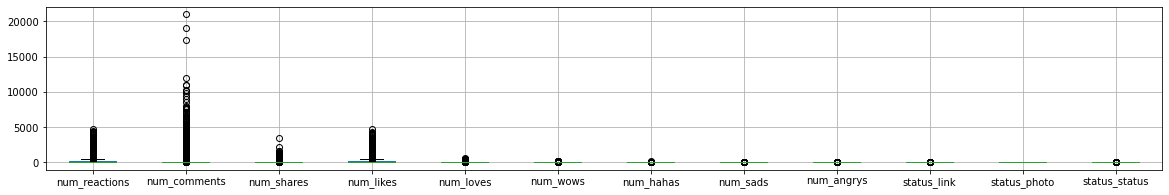

In [114]:
data_df.boxplot(figsize=(20,3))

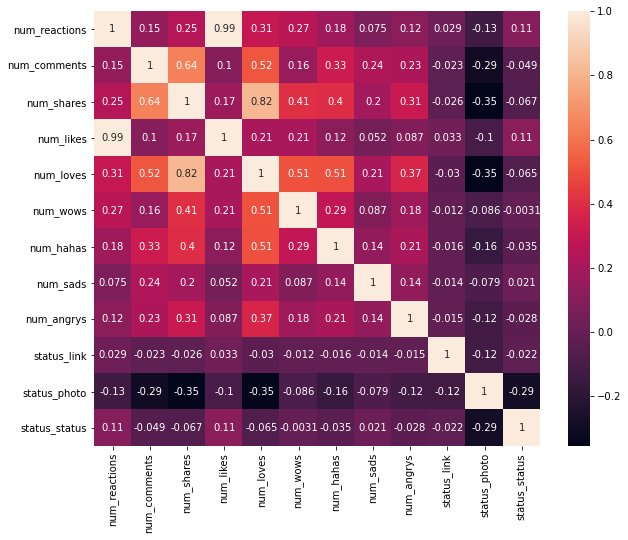

In [115]:
plt.subplots(figsize=(10,8))
sns.heatmap(data_df.corr(), annot=True)  # plot the correlation coefficients as a heatmap

In [116]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [117]:
lr1,ur1=remove_outlier(data_df['num_reactions'])
data_df['num_reactions']=np.where(data_df['num_reactions']>ur1,ur1,data_df['num_reactions'])
data_df['num_reactions']=np.where(data_df['num_reactions']<lr1,lr1,data_df['num_reactions'])

lr2,ur2=remove_outlier(data_df['num_comments'])
data_df['num_comments']=np.where(data_df['num_comments']>ur2,ur2,data_df['num_comments'])
data_df['num_comments']=np.where(data_df['num_comments']<lr2,lr2,data_df['num_comments'])

lr3,ur3=remove_outlier(data_df['num_shares'])
data_df['num_shares']=np.where(data_df['num_shares']>ur3,ur3,data_df['num_shares'])
data_df['num_shares']=np.where(data_df['num_shares']<lr3,lr3,data_df['num_shares'])

lr4,ur4=remove_outlier(data_df['num_likes'])
data_df['num_likes']=np.where(data_df['num_likes']>ur4,ur4,data_df['num_likes'])
data_df['num_likes']=np.where(data_df['num_likes']<lr4,lr4,data_df['num_likes'])

lr5,ur5=remove_outlier(data_df['num_loves'])
data_df['num_loves']=np.where(data_df['num_loves']>ur5,ur5,data_df['num_loves'])
data_df['num_loves']=np.where(data_df['num_loves']<lr5,lr5,data_df['num_loves'])

lr6,ur6=remove_outlier(data_df['num_wows'])
data_df['num_wows']=np.where(data_df['num_wows']>ur6,ur6,data_df['num_wows'])
data_df['num_wows']=np.where(data_df['num_wows']<lr6,lr6,data_df['num_wows'])

lr7,ur7=remove_outlier(data_df['num_hahas'])
data_df['num_hahas']=np.where(data_df['num_hahas']>ur7,ur7,data_df['num_hahas'])
data_df['num_hahas']=np.where(data_df['num_hahas']<lr7,lr7,data_df['num_hahas'])

lr8,ur8=remove_outlier(data_df['num_sads'])
data_df['num_sads']=np.where(data_df['num_sads']>ur8,ur8,data_df['num_sads'])
data_df['num_sads']=np.where(data_df['num_sads']<lr8,lr8,data_df['num_sads'])

lr9,ur9=remove_outlier(data_df['num_angrys'])
data_df['num_angrys']=np.where(data_df['num_angrys']>ur9,ur9,data_df['num_angrys'])
data_df['num_angrys']=np.where(data_df['num_angrys']<lr9,lr9,data_df['num_angrys'])

lr10,ur10=remove_outlier(data_df['status_link'])
data_df['status_link']=np.where(data_df['status_link']>ur10,ur10,data_df['status_link'])
data_df['status_link']=np.where(data_df['status_link']<lr10,lr10,data_df['status_link'])

lr11,ur11=remove_outlier(data_df['status_status'])
data_df['status_status']=np.where(data_df['status_status']>ur11,ur11,data_df['status_status'])
data_df['status_status']=np.where(data_df['status_status']<lr11,lr11,data_df['status_status'])



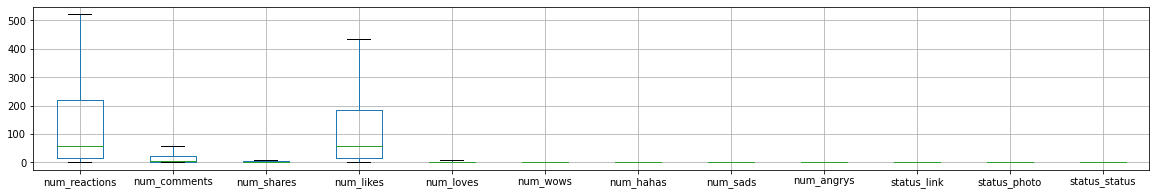

In [120]:
data_df.boxplot(figsize=(20,3))

In [155]:
data_df = data_df.drop(['status_id'], axis =1)

In [164]:
data_df.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_link,status_photo,status_status
0,522.0,57.5,10.0,432.0,7.5,0.0,0.0,0.0,0.0,0.0,0,0.0
1,150.0,0.0,0.0,150.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
2,227.0,57.5,10.0,204.0,7.5,0.0,0.0,0.0,0.0,0.0,0,0.0
3,111.0,0.0,0.0,111.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0
4,213.0,0.0,0.0,204.0,7.5,0.0,0.0,0.0,0.0,0.0,1,0.0


In [165]:
data_df.shape

(7050, 12)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_link,status_photo,status_status
0,2.260494,1.866293,1.849082,2.155071,1.864833,NaN,NaN,NaN,NaN,NaN,-1.245993,NaN
1,0.044755,-0.729418,-0.660839,0.180181,-0.657597,NaN,NaN,NaN,NaN,NaN,0.802573,NaN
2,0.503389,1.866293,1.849082,0.558351,1.864833,NaN,NaN,NaN,NaN,NaN,-1.245993,NaN
3,-0.187540,-0.729418,-0.660839,-0.092943,-0.657597,NaN,NaN,NaN,NaN,NaN,0.802573,NaN
4,0.420001,-0.729418,-0.660839,0.558351,1.864833,NaN,NaN,NaN,NaN,NaN,0.802573,NaN


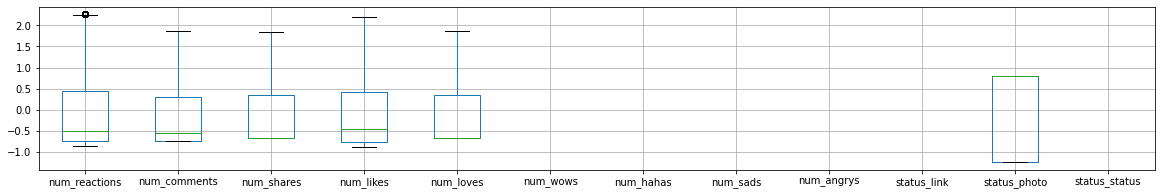

In [160]:
data_new.boxplot(figsize=(20,3))

(7050, 6)

In [162]:
# PCA
# Step 1 - Create covariance matrix

cov_matrix = np.cov(data_new.T)
print('Covariance Matrix \n%s', cov_matrix)


Covariance Matrix 
%s [[ 1.00014186  0.54110292  0.45580023  0.99024655  0.47415156         nan
          nan         nan         nan         nan -0.25446523         nan]
 [ 0.54110292  1.00014186  0.79020791  0.48568216  0.78846008         nan
          nan         nan         nan         nan -0.44599823         nan]
 [ 0.45580023  0.79020791  1.00014186  0.39949395  0.72344869         nan
          nan         nan         nan         nan -0.4819995          nan]
 [ 0.99024655  0.48568216  0.39949395  1.00014186  0.42544802         nan
          nan         nan         nan         nan -0.21201568         nan]
 [ 0.47415156  0.78846008  0.72344869  0.42544802  1.00014186         nan
          nan         nan         nan         nan -0.37641369         nan]
 [        nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan]
 [        nan         nan         nan         nan         nan         nan
          

In [163]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

LinAlgError: Array must not contain infs or NaNs

2 eig vlues > 1

In [136]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained: ", cum_var_exp)

Cumulative Variance Explained:  [ 61.18757656  81.0679542   92.38625886  96.80421958  99.87631753
 100.        ]


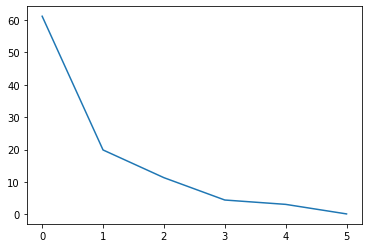

In [137]:
plt.plot(var_exp)

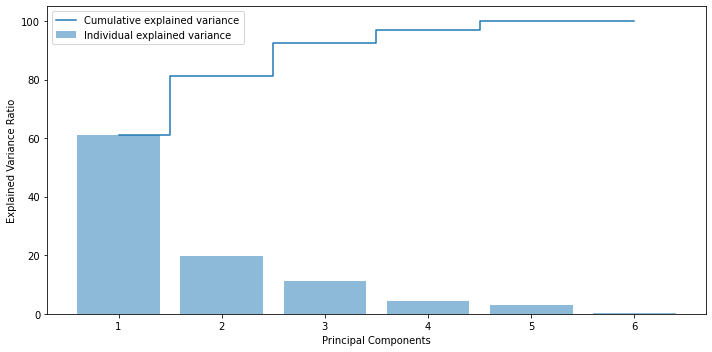

In [138]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [140]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 4 PCA dimensions 

pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data_new)
data_reduced.T  #transpose

array([[ 4.62081218, -1.04737109,  3.25611194, ..., -1.6827814 ,
         1.63447395, -1.7462034 ],
       [ 0.54175276,  0.97801681, -1.33976615, ..., -0.18899446,
         1.37069957,  0.00557368]])

In [141]:
pca.components_

array([[ 0.4177248 ,  0.46027233,  0.43503504,  0.39500595,  0.43114378,
        -0.28720242],
       [ 0.53743156, -0.21750263, -0.31448671,  0.58695027, -0.24019581,
         0.40342705]])

In [142]:
pca.explained_variance_ratio_

array([0.61187577, 0.19880378])

In [143]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([61.2, 81.1])

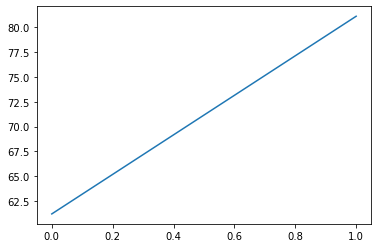

In [144]:
plt.plot(var)

In [145]:
df_comp = pd.DataFrame(pca.components_,columns=list(data_new))
df_comp.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,status_photo
0,0.417725,0.460272,0.435035,0.395006,0.431144,-0.287202
1,0.537432,-0.217503,-0.314487,0.586950,-0.240196,0.403427


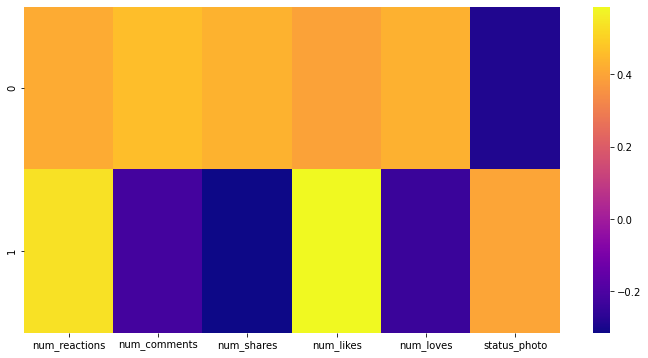

In [146]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [73]:
# This heatmap and the color bar basically represent the correlation between the various feature 
# and the principal component itself
# Component 5 looks more related to size and shape - We can label it as physical property
# PC1 could be labeeled with Mitoses
# Depending on relations ship, we could go ahead and label relationship with features